In [1]:
import re
import json
import numpy as np
import pandas as pd
from pathlib import Path
from qwen_math_parser import extract_answer, strip_string
from grader import math_equal
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
result_df = pd.read_csv(Path.cwd().parent / "results" / "merged_results.csv")

In [4]:
result_df.head(5)

,model_id,dataset,file_path,response_number,accuracy,reasoning_step,average_divergence,n_reasoning_steps
0,Qwen/Qwen2.5-0.5B-Instruct,math500,200results.json,0,False,0,19.164455,6
1,Qwen/Qwen2.5-0.5B-Instruct,math500,200results.json,0,False,1,16.839956,6
2,Qwen/Qwen2.5-0.5B-Instruct,math500,200results.json,0,False,2,17.561178,6
3,Qwen/Qwen2.5-0.5B-Instruct,math500,200results.json,0,False,3,18.563135,6
4,Qwen/Qwen2.5-0.5B-Instruct,math500,200results.json,0,False,4,19.341131,6


In [5]:
result_df["accuracy"] = (
    result_df["accuracy"].map({True: "Correct", False: "Incorrect"}).astype("category")
)

# Forward pass

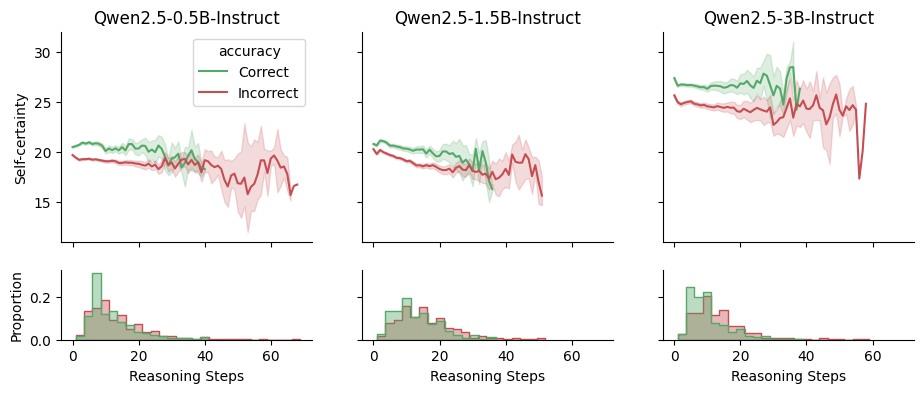

In [11]:
fig, axs = plt.subplots(
    figsize=(11, 4),
    ncols=3,
    nrows=2,
    sharex=True,
    sharey="row",
    gridspec_kw={"height_ratios": [3, 1]},
)
for i, model_id in enumerate(
    [
        "Qwen/Qwen2.5-0.5B-Instruct",
        "Qwen/Qwen2.5-1.5B-Instruct",
        "Qwen/Qwen2.5-3B-Instruct",
    ]
):
    ln_plot = sns.lineplot(
        result_df[(result_df.model_id == model_id) & (result_df.dataset == "math500")],
        x="reasoning_step",
        y="average_divergence",
        hue="accuracy",
        ax=axs[0, i],
        palette={"Incorrect": "#c44e52", "Correct": "#55a868"},
    )

    for col, bol in zip(["#c44e52", "#55a868"], ["Incorrect", "Correct"]):
        sns.histplot(
            result_df[
                (result_df.model_id == model_id)
                & (result_df.dataset == "math500")
                & (result_df.accuracy == bol)
            ],
            x="n_reasoning_steps",
            ax=axs[1, i],
            binwidth=2.5,
            element="step",
            stat="proportion",
            color=col,
            label=bol,
            alpha=0.4,
        )
    axs[0, i].set(title=model_id[5:])
    axs[1, i].set(xlabel="Reasoning Steps")
axs[0, 0].set(ylabel="Self-certainty")

for i in range(1, 3):
    axs[0, i].legend_.remove()
sns.despine()
plt.savefig(
    Path.cwd().parent / "figures" / "figure_2.pdf", bbox_inches="tight", dpi=300
)

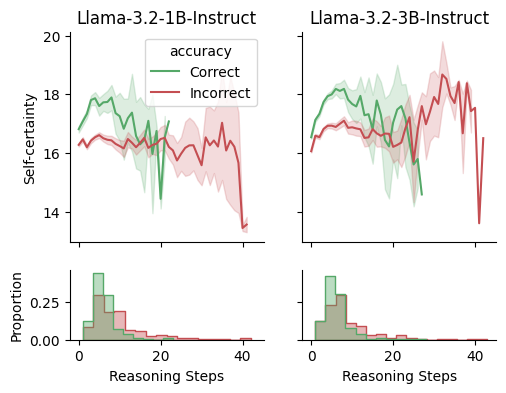

In [10]:
fig, axs = plt.subplots(
    figsize=(5.5, 4),
    ncols=2,
    nrows=2,
    sharex=True,
    sharey="row",
    gridspec_kw={"height_ratios": [3, 1]},
)
for i, model_id in enumerate(
    [
        "meta-llama/Llama-3.2-1B-Instruct",
        "meta-llama/Llama-3.2-3B-Instruct",
    ]
):
    sns.lineplot(
        result_df[(result_df.model_id == model_id) & (result_df.dataset == "math500")],
        x="reasoning_step",
        y="average_divergence",
        hue="accuracy",
        ax=axs[0, i],
        palette={"Incorrect": "#c44e52", "Correct": "#55a868"},
    )

    for col, bol in zip(["#c44e52", "#55a868"], ["Incorrect", "Correct"]):
        sns.histplot(
            result_df[
                (result_df.model_id == model_id)
                & (result_df.dataset == "math500")
                & (result_df.accuracy == bol)
            ],
            x="n_reasoning_steps",
            ax=axs[1, i],
            binwidth=2.5,
            element="step",
            stat="proportion",
            color=col,
            label=bol,
            alpha=0.4,
        )
    axs[0, i].set(title=model_id[11:])
    axs[1, i].set(xlabel="Reasoning Steps")
axs[0, 0].set(ylabel="Self-certainty")

for i in range(1, 2):
    axs[0, i].legend_.remove()

sns.despine()
plt.savefig(
    Path.cwd().parent / "figures" / "figure_5.pdf", bbox_inches="tight", dpi=300
)

ValueError: Could not interpret value `kl_benefit` for `y`. An entry with this name does not appear in `data`.

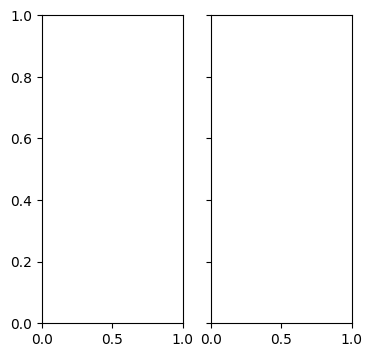

In [27]:
fig, axs = plt.subplots(figsize=(4, 4), ncols=2, sharex=True, sharey=True)

sns.lineplot(
    result_df[
        (result_df.dataset == "math500")
        & result_df.model_id.isin(
            [
                "Qwen/Qwen2.5-0.5B-Instruct",
                "Qwen/Qwen2.5-1.5B-Instruct",
                "Qwen/Qwen2.5-3B-Instruct",
            ]
        )
    ],
    x="reasoning_step",
    y="kl_benefit",
    hue="accuracy",
    ax=axs[0],
    palette={"Incorrect": "#c44e52", "Correct": "#55a868"},
)
sns.lineplot(
    result_df[
        (result_df.dataset == "math500")
        & result_df.model.isin(["Llama-3.2-1B-Instruct", "Llama-3.2-3B-Instruct"])
    ],
    x="reasoning_step",
    y="kl_benefit",
    hue="accuracy",
    ax=axs[1],
    palette={"Incorrect": "#c44e52", "Correct": "#55a868"},
)

axs[0].set(
    title="Qwen",
    xticks=np.arange(0, 35, 5),
    xlim=(0, 15),
    ylabel="Self-certainty improvement",
    xlabel="Reasoning Steps",
)
axs[1].set(title="Llama", xlabel="Reasoning Steps")

axs[1].legend_.remove()
sns.despine()

plt.savefig("figure_5.pdf", bbox_inches="tight", dpi=300)

# MATH500

In [8]:
sns.histplot(
    result_df[
        (result_df.model_id == model_id)
        & (result_df.dataset == "math500")
        & (result_df.accuracy == "Correct")
        & (result_df.reasoning_step == 0)
    ],
    x="average_divergence",
    element="step",
    stat="proportion",
    color=col,
    label=bol,
    alpha=0.4,
)

sns.histplot(
    result_df[
        (result_df.model_id == model_id)
        & (result_df.dataset == "math500")
        & (result_df.accuracy == "Incorrect")
        & (result_df.reasoning_step == 0)
    ],
    x="average_divergence",
    element="step",
    stat="proportion",
    color="#c44e52",
    label=bol,
    alpha=0.4,
)

NameError: name 'model_id' is not defined

# Danish dataset

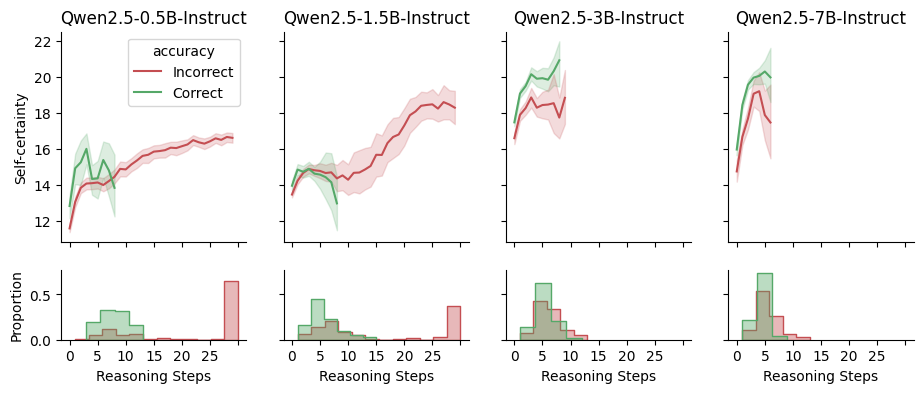

In [10]:
fig, axs = plt.subplots(
    figsize=(11, 4),
    ncols=4,
    nrows=2,
    sharex=True,
    sharey="row",
    gridspec_kw={"height_ratios": [3, 1]},
)
for i, model in enumerate(
    [
        "Qwen2.5-0.5B-Instruct",
        "Qwen2.5-1.5B-Instruct",
        "Qwen2.5-3B-Instruct",
        "Qwen2.5-7B-Instruct",
    ]
):
    sns.lineplot(
        result_df[(result_df.model == model) & (result_df.dataset == "gsm8k-da")],
        x="reasoning_step",
        y="kl",
        hue="accuracy",
        ax=axs[0, i],
        palette={"Incorrect": "#c44e52", "Correct": "#55a868"},
    )

    for col, bol in zip(["#c44e52", "#55a868"], ["Incorrect", "Correct"]):
        sns.histplot(
            result_df[
                (result_df.model == model)
                & (result_df.dataset == "gsm8k-da")
                & (result_df.accuracy == bol)
            ],
            x="n_reasoning_steps",
            ax=axs[1, i],
            binwidth=2.5,
            element="step",
            stat="proportion",
            color=col,
            label=bol,
            alpha=0.4,
        )
    axs[0, i].set(title=model, xticks=np.arange(0, 35, 5))
    axs[1, i].set(xlabel="Reasoning Steps")
axs[0, 0].set(ylabel="Self-certainty")

for i in range(1, 4):
    axs[0, i].legend_.remove()

sns.despine()

# English dataset

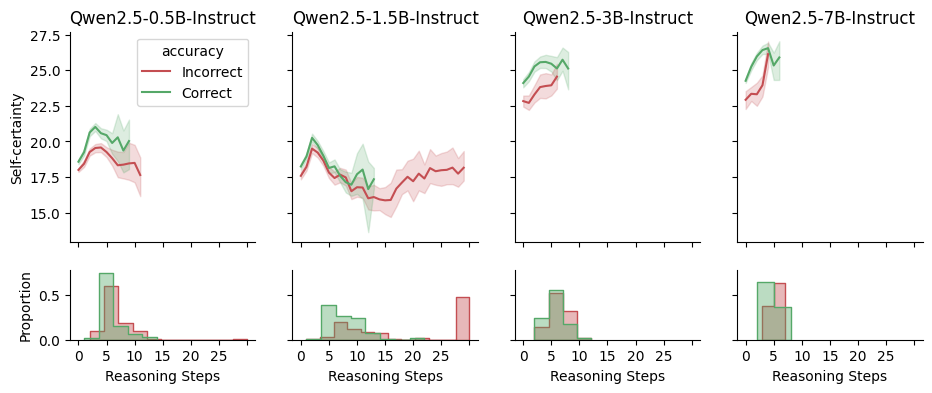

In [11]:
fig, axs = plt.subplots(
    figsize=(11, 4),
    ncols=4,
    nrows=2,
    sharex=True,
    sharey="row",
    gridspec_kw={"height_ratios": [3, 1]},
)
for i, model in enumerate(
    [
        "Qwen2.5-0.5B-Instruct",
        "Qwen2.5-1.5B-Instruct",
        "Qwen2.5-3B-Instruct",
        "Qwen2.5-7B-Instruct",
    ]
):
    sns.lineplot(
        result_df[(result_df.model == model) & (result_df.dataset == "gsm8k-en")],
        x="reasoning_step",
        y="kl",
        hue="accuracy",
        ax=axs[0, i],
        palette={"Incorrect": "#c44e52", "Correct": "#55a868"},
    )

    for col, bol in zip(["#c44e52", "#55a868"], ["Incorrect", "Correct"]):
        sns.histplot(
            result_df[
                (result_df.model == model)
                & (result_df.dataset == "gsm8k-en")
                & (result_df.accuracy == bol)
            ],
            x="n_reasoning_steps",
            ax=axs[1, i],
            binwidth=2.5,
            element="step",
            stat="proportion",
            color=col,
            label=bol,
            alpha=0.4,
        )
    axs[0, i].set(title=model, xticks=np.arange(0, 35, 5))
    axs[1, i].set(xlabel="Reasoning Steps")
axs[0, 0].set(ylabel="Self-certainty")

for i in range(1, 4):
    axs[0, i].legend_.remove()

sns.despine()